**Statement of the Problem**

Suppose we have two containers $A$ and $B$, with a total of $N$ balls between them. At each time-step a ball is chosen at random, from amongst the $N$ balls, and moved from the container it is in to the second container.

Let us mark the total number of balls in container $A$ as $T_A$. Clearly, $T_A$ may be any number between $0$ and $N$. We may therefore allow $T_A$ to be represented by the states $T_0$ through $T_N$, where we drop the subscript $A$. The probability of going from state $T_i$ to state $T_{i-1}$ is equal to $i/N$ and the probability of going from state $T_i$ to $T_{i+1}$ is $1-i/N$.

We can calculate the transition matrix for any given N:

In [44]:
import numpy as np
from numpy.linalg import matrix_power as mp
import pylab as plt
%matplotlib inline

N = 4

def create_transition_matrix(N):    
    P = np.zeros((N+1,N+1))

    for i in range(N+1):
        if i == 0:
            P[i,i+1] = 1
        elif i == N:
            P[i,i-1] = 1
        else:
            P[i,i-1] = i/N
            P[i,i+1] = 1 - i/N
    
    return P

def expectation_of_visits(P, visited_state, steps):
    Ev = 0
    
    for k in range(1, steps + 1):
        Ev += mp(P,k)[visited_state, visited_state]
    
    return Ev

def expectation_of_visits_for_N(N, visited_state, steps):
    P = create_transition_matrix(N)
    
    return expectation_of_visits(P, visited_state, steps)

In [45]:
N = np.arange(1,15)
Ev = np.zeros(N.shape)

for idx, n in enumerate(N):
    Ev[idx] = expectation_of_visits_for_N(n, 0, 10000)

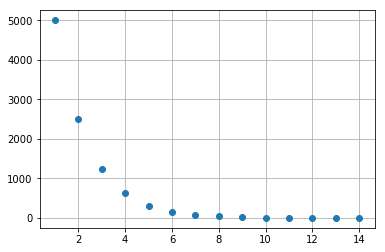

In [47]:
plt.plot(N,Ev, 'o')
plt.grid()